In [9]:
import pandas as pd
import os
import numpy as np
import glob
import tarfile

# Contact only

## 1. Extract contact tsv

In [4]:
hic_folder = r'L:\Shiwei\DNA_MERFISH_analysis\mouse_m3C\test_contacts'
hic_contact_fname_list = glob.glob(hic_folder+r'\*')
hic_contact_fname_list

['L:\\Shiwei\\DNA_MERFISH_analysis\\mouse_m3C\\test_contacts\\CEMBA3C_14A3C_R2_P1-1-H6-B2.3C.contact.tsv.tar',
 'L:\\Shiwei\\DNA_MERFISH_analysis\\mouse_m3C\\test_contacts\\CEMBA3C_14A3C_R2_P1-1-H6-F14.3C.contact.tsv.tar',
 'L:\\Shiwei\\DNA_MERFISH_analysis\\mouse_m3C\\test_contacts\\CEMBA3C_14A3C_R2_P1-1-H6-G1.3C.contact.tsv.tar']

In [38]:
#hic_contact_fname = hic_contact_fname_list[0]
hic_extract_folder = os.path.join(hic_folder,r'extracted')

for hic_contact_fname in hic_contact_fname_list:
    with tarfile.open(hic_contact_fname, 'r|*') as file:
        file.extractall(hic_extract_folder)
        file.close()

## 2. Inspect contact tsv

In [39]:
hic_contact_fname_list = glob.glob(hic_extract_folder+r'\*')
hic_contact_fname_list

['L:\\Shiwei\\DNA_MERFISH_analysis\\mouse_m3C\\test_contacts\\extracted\\CEMBA3C_14A3C_R2_P1-1-H6-B2.3C.contact',
 'L:\\Shiwei\\DNA_MERFISH_analysis\\mouse_m3C\\test_contacts\\extracted\\CEMBA3C_14A3C_R2_P1-1-H6-F14.3C.contact',
 'L:\\Shiwei\\DNA_MERFISH_analysis\\mouse_m3C\\test_contacts\\extracted\\CEMBA3C_14A3C_R2_P1-1-H6-G1.3C.contact']

In [43]:
test_fname.split('\\')[-1]

'CEMBA3C_14A3C_R2_P1-1-H6-B2.3C.contact'

In [44]:
test_fname = hic_contact_fname_list[0]
df = pd.read_csv(os.path.join(test_fname, test_fname.split('\\')[-1]+'.tsv.gz'), compression='gzip', header=None, sep="\t")

In [45]:
df

,0,1,2,3,4,5,6,7
0,0,chr1,3098118,0,0,chr1,19264232,1
1,0,chr1,3172932,0,0,chr1,21232532,1
2,0,chr1,3216628,0,0,chr1,3284234,1
3,0,chr1,3229715,0,0,chr1,21903010,1
4,0,chr1,3237454,0,0,chr1,3246352,1
...,...,...,...,...,...,...,...,...
323283,1,chrY,75901181,0,1,chrY,84281864,1
323284,1,chrY,78928578,0,1,chrY,83390777,1
323285,1,chrY,82382296,0,1,chrY,87991641,1
323286,1,chrY,85137685,0,1,chrY,85144479,1


In [48]:
np.unique(df[0])

array([0, 1], dtype=int64)

In [47]:
np.unique(df[3])

array([0], dtype=int64)

In [49]:
np.unique(df[4])

array([0, 1], dtype=int64)

In [50]:
np.unique(df[7])

array([1], dtype=int64)

In [55]:
sel_df = df[(df[0]==1) & (df[4]==1)]
sel_df = sel_df[(sel_df[1]=='chr1') & (sel_df[4]==1)]
sel_df

C:\Users\shiwei\AppData\Local\Temp\2\ipykernel_36644\2489584518.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sel_df = sel_df[(df[1]=='chr1') & (df[4]==1)]


,0,1,2,3,4,5,6,7
13560,1,chr1,3008744,0,1,chr1,62545084,1
13561,1,chr1,3008744,0,1,chr1,62545084,1
13562,1,chr1,3049433,0,1,chr1,3058310,1
13563,1,chr1,3225683,0,1,chr1,3248765,1
13564,1,chr1,3281635,0,1,chr1,3284952,1
...,...,...,...,...,...,...,...,...
30747,1,chr1,78995392,0,1,chrY,44415649,1
30748,1,chr1,83913023,0,1,chrY,4282556,1
30749,1,chr1,156774372,0,1,chrY,41911837,1
30750,1,chr1,165100623,0,1,chrY,33707267,1


In [57]:
sel_df[sel_df[5]=='chr1']

,0,1,2,3,4,5,6,7
13560,1,chr1,3008744,0,1,chr1,62545084,1
13561,1,chr1,3008744,0,1,chr1,62545084,1
13562,1,chr1,3049433,0,1,chr1,3058310,1
13563,1,chr1,3225683,0,1,chr1,3248765,1
13564,1,chr1,3281635,0,1,chr1,3284952,1
...,...,...,...,...,...,...,...,...
17980,1,chr1,194833726,0,1,chr1,194839514,1
17981,1,chr1,194853686,0,1,chr1,194857325,1
17982,1,chr1,194972905,0,1,chr1,194988194,1
17983,1,chr1,194991293,0,1,chr1,194998299,1


In [59]:
sel_df[sel_df[5]=='chr3']

,0,1,2,3,4,5,6,7
24279,1,chr1,3173581,0,1,chr3,31383367,1
24280,1,chr1,4546558,0,1,chr3,78293309,1
24281,1,chr1,5443729,0,1,chr3,4633923,1
24282,1,chr1,5488979,0,1,chr3,38273447,1
24283,1,chr1,7658438,0,1,chr3,13280546,1
...,...,...,...,...,...,...,...,...
24440,1,chr1,193526992,0,1,chr3,63871274,1
24441,1,chr1,193868587,0,1,chr3,3876325,1
24442,1,chr1,194297251,0,1,chr3,141987908,1
24443,1,chr1,194297251,0,1,chr3,141987909,1


In [62]:
sel_df[sel_df[2]==5443729]

,0,1,2,3,4,5,6,7
24281,1,chr1,5443729,0,1,chr3,4633923,1


# All region

## 1. Inspect the allc tsv

In [81]:
hic_folder = r'L:\Shiwei\DNA_MERFISH_analysis\mouse_m3C\test'
hic_contact_fname_list = glob.glob(hic_folder+r'\*')
hic_contact_fname_list

['L:\\Shiwei\\DNA_MERFISH_analysis\\mouse_m3C\\test\\CEMBA3C_10A3C_R2_P4-1-C23-H2.allc.tsv.tar',
 'L:\\Shiwei\\DNA_MERFISH_analysis\\mouse_m3C\\test\\extracted']

In [82]:
#hic_contact_fname = hic_contact_fname_list[0]
hic_extract_folder = os.path.join(hic_folder,r'extracted')
if not os.path.exists(hic_extract_folder):
    os.mkdir(hic_extract_folder)
    
for hic_contact_fname in hic_contact_fname_list:
    with tarfile.open(hic_contact_fname, 'r|*') as file:
        file.extractall(hic_extract_folder)
        file.close()

PermissionError: [Errno 13] Permission denied: 'L:\\Shiwei\\DNA_MERFISH_analysis\\mouse_m3C\\test\\extracted'

In [78]:
hic_contact_fname_list = glob.glob(hic_extract_folder+r'\*')
hic_contact_fname_list

['L:\\Shiwei\\DNA_MERFISH_analysis\\mouse_m3C\\test\\extracted\\CEMBA3C_10A3C_R2_P4-1-C23-H2.allc']

In [79]:

test_fname = hic_contact_fname_list[0]
df_all = pd.read_csv(os.path.join(test_fname, test_fname.split('\\')[-1]+'.tsv.gz'), compression='gzip', header=None, sep="\t")

In [84]:
df_chr1 = df_all[df_all[0]=='chr1']

In [85]:
df_chr1 
# single base pair resolution

,0,1,2,3,4,5,6
0,chr1,3000737,+,CCA,0,1,1
1,chr1,3000738,+,CAA,0,1,1
2,chr1,3000742,+,CTA,0,1,1
3,chr1,3000746,+,CAT,0,1,1
4,chr1,3000765,+,CAG,0,1,1
...,...,...,...,...,...,...,...
3856343,chr1,195371296,-,CTT,0,2,1
3856344,chr1,195371297,-,CCT,0,2,1
3856345,chr1,195371300,-,CAG,0,2,1
3856346,chr1,195371317,-,CTT,0,2,1


# Codebook from MERFISH

In [87]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

In [88]:
# load codebook
# L drive is Crick Pu_SSD_0
codebook_save_folder=r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_20230201\postanalysis_vCW2_sorted'

# Load sorted codebook (allows direct matrix slicing) with cell type info
# Load codebook (then sort to allow direct matrix slicing) with cell type info

codebook_fname = os.path.join(codebook_save_folder,'MERFISH_loci_adjacent_genes_tss_more_res.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df temporailiy so matrix can be sliced by df order directly
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)

codebook_df.head()

,name,id,chr,chr_order,library,dtype,adjacent_genes_0kb_tss,adjacent_genes_10kb_tss,adjacent_genes_50kb_tss,adjacent_genes_100kb_tss,adjacent_genes_200kb_tss,adjacent_genes_500kb_tss,adjacent_genes_1000kb_tss,adjacent_genes_1500kb_tss,adjacent_genes_2000kb_tss
loci_name,,,,,,,,,,,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0,CTP11,combo,intergenic,intergenic,intergenic,Xkr4,Xkr4,Gm18956; Gm7341; Xkr4,Gm18956; Gm2053; Gm6085; Gm6101; Gm6119; Gm734...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...
chr1_6245958_6258969,1:6245958-6258969,2,1,1,CTP11,combo,intergenic,intergenic,4732440D04Rik; Rb1cc1,4732440D04Rik; Rb1cc1,4732440D04Rik; Gm19026; Gm2147; Rb1cc1,4732440D04Rik; Gm19026; Gm2147; Npbwr1; Rb1cc1...,4732440D04Rik; Gm19026; Gm2147; Gm5694; Gm7182...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...
chr1_8740008_8759916,1:8740008-8759916,3,1,2,CTP11,combo,intergenic,intergenic,Gm15452,Gm15452,Gm15452,Gm15452,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm15452;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...
chr1_9627926_9637875,1:9627926-9637875,1,1,3,CTP13,combo,2610203C22Rik,2610203C22Rik,2610203C22Rik,2610203C22Rik; Adhfe1; Gm6161; Mybl1; Rrs1,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm18300;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Cops5; C...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...
chr1_9799472_9811359,1:9799472-9811359,2,1,4,CTP13,combo,Gm6195,Gm6195; Sgk3,Gm6195; Sgk3,1700034P13Rik; Gm6195; Mcmdc2; Mybl1; Sgk3; Vc...,1700034P13Rik; 2610203C22Rik; Gm6195; Mcmdc2; ...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...


## 1. Assemble around loci for Chr1

In [110]:
print(np.unique(df[0]))
print(np.unique(df[3]))
print(np.unique(df[4]))
print(np.unique(df[7]))

[0 1]
[0]
[0 1]
[1]


In [89]:
df.head()

# all col3 is 0
# all col7 is 1

# it appears col0 and col4 are count?
# so contacts are where both col0 and col4 are 1?

,0,1,2,3,4,5,6,7
0,0,chr1,3098118,0,0,chr1,19264232,1
1,0,chr1,3172932,0,0,chr1,21232532,1
2,0,chr1,3216628,0,0,chr1,3284234,1
3,0,chr1,3229715,0,0,chr1,21903010,1
4,0,chr1,3237454,0,0,chr1,3246352,1


In [108]:
all_sorted_chr = ['chr' + str(i) for i in range(1,20)]
all_sorted_chr.append('chrX')
all_sorted_chr[:2]

['chr1', 'chr2']

### loop through loci to subset 

In [137]:
import time
_start_time = time.time()

all_chr_contact_dict = {}

import tqdm 

#for _chr in tqdm.tqdm(all_sorted_chr[:1]):
for _chr in ['chr4']:
    _chr_count_df = df[(df[1]==_chr) & (df[5]==_chr)] # subset cis-contact
    _chr_count_df = _chr_count_df[(_chr_count_df[0]==1)&(_chr_count_df[4]==1)] # subset contact?
    
    codebook_df_chr = codebook_df[codebook_df['chr']==_chr.split('chr')[1]]
    codebook_df_chr_loci = codebook_df_chr.index

    _ext = 500000 # extend bp for imaged loci each way 
    
    all_chr_contact_dict[_chr] = {}

    for _loci in codebook_df_chr_loci:
        _start =int(_loci.split('_')[1])-_ext
        _stop = int(_loci.split('_')[2])+_ext
        _sub_df = _chr_count_df[(_chr_count_df[2]>_start) & (_chr_count_df[2]<_stop)]
        
        all_chr_contact_dict[_chr][_loci] = {}
        for _loci_2 in codebook_df_chr_loci:
            _start_2 =int(_loci_2.split('_')[1])-_ext
            _stop_2 = int(_loci_2.split('_')[2])+_ext
            _sub_df_pair = _sub_df[(_sub_df[6]>_start_2) & (_sub_df[6]<_stop_2)]
            
            all_chr_contact_dict[_chr][_loci][_loci_2] = len(_sub_df_pair)
        
    count_matrix_df = pd.DataFrame(all_chr_contact_dict[_chr])
    count_matrix  = count_matrix_df.values

print (f"Complete in {time.time()-_start_time:.3f}s.")

Complete in 7.627s.


In [227]:
import time
_start_time = time.time()

all_chr_contact_dict = {}

import tqdm 

#for _chr in tqdm.tqdm(all_sorted_chr[:1]):
for _chr in ['chr4']:
    _chr_count_df = df[(df[1]==_chr) & (df[5]==_chr)] # subset cis-contact
    _chr_count_df = _chr_count_df[(_chr_count_df[0]==1)&(_chr_count_df[4]==1)] # subset contact?
    
    codebook_df_chr = codebook_df[codebook_df['chr']==_chr.split('chr')[1]]
    codebook_df_chr_loci = codebook_df_chr.index

    _ext = 500000 # extend bp for imaged loci each way 
    
    all_chr_contact_dict[_chr] = {}
    
    _query_loci_list_1 = np.array(_chr_count_df[2])
    _query_loci_list_2 = np.array(_chr_count_df[6])

    for _loci in codebook_df_chr_loci:
        _start =int(_loci.split('_')[1])-_ext
        _stop = int(_loci.split('_')[2])+_ext
        sel_query_loci_list_1 = (_query_loci_list_1>_start)&(_query_loci_list_1<_stop)
        
        all_chr_contact_dict[_chr][_loci] = {}
        for _loci_2 in codebook_df_chr_loci:
            _start_2 =int(_loci_2.split('_')[1])-_ext
            _stop_2 = int(_loci_2.split('_')[2])+_ext
            sel_query_loci_list_2 = (_query_loci_list_2>_start_2)&(_query_loci_list_2<_stop_2)
            sel_query_loci_list_pair = sel_query_loci_list_1 & sel_query_loci_list_2
            all_chr_contact_dict[_chr][_loci][_loci_2] = np.sum(sel_query_loci_list_pair)
        
    count_matrix_df = pd.DataFrame(all_chr_contact_dict[_chr])
    count_matrix  = count_matrix_df.values

print (f"Complete in {time.time()-_start_time:.3f}s.")

Complete in 0.463s.


<AxesSubplot: >

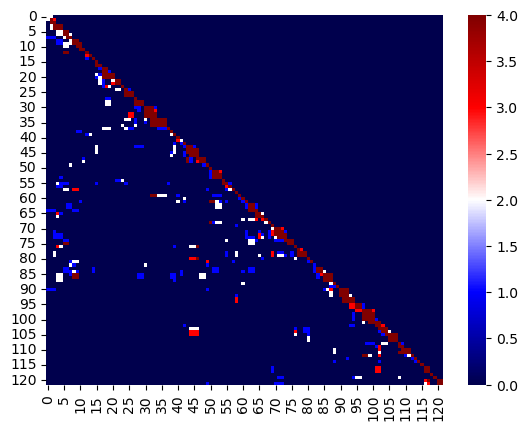

In [229]:
import seaborn as sns

sns.heatmap(count_matrix, cmap='seismic', vmax=4)

### find matched loci before subset

In [203]:
import time
_start_time = time.time()

all_chr_contact_dict = {}

import tqdm 

#for _chr in tqdm.tqdm(all_sorted_chr[:1]):
for _chr in ['chr4']:
    _chr_count_df = df[(df[1]==_chr) & (df[5]==_chr)] # subset cis-contact
    _chr_count_df = _chr_count_df[(_chr_count_df[0]==1)&(_chr_count_df[4]==1)] # subset contact?
    
    codebook_df_chr = codebook_df[codebook_df['chr']==_chr.split('chr')[1]]
    codebook_df_chr_loci = codebook_df_chr.index

    _ext = 500000 # extend bp for imaged loci each way 
    
    all_chr_contact_dict[_chr] = {}
    
    
    # find the adjcent imaged loci
    codebook_df_chr_loci_v1 = np.array([i.split('_') for i in codebook_df_chr_loci])
    _starts = codebook_df_chr_loci_v1[:,1]
    _starts = np.array([int(x) for x in _starts])
    _stops = codebook_df_chr_loci_v1[:,2]
    _stops = np.array([int(x) for x in _stops])
    _mids = (_stops + _starts)/2
    
    for _col,_loci_pair_order in zip([2,6],['loci0','loci1']):
        query_pos_list = _chr_count_df[_col].tolist()
        matched_loci_idx_list = []
        for query_pos in query_pos_list:
            _dists = abs(_mids-query_pos)
            matched_loci_idx = np.where(_dists<_ext)[0]
            matched_loci_idx = [str(i) for i in matched_loci_idx]
            #matched_loci_idx_list.append(matched_loci_idx)
            matched_loci_idx_str = 'l'.join(matched_loci_idx)
            matched_loci_idx_list.append('l'+ matched_loci_idx_str)
            
        _chr_count_df[f'{_loci_pair_order}_codebook_idx'] = matched_loci_idx_list   
    # assemble by the matched imaged loci
    for _i in range(len(codebook_df_chr_loci)):
        for _j in range(len(codebook_df_chr_loci)):
            _sub_df_pair = _chr_count_df[(_chr_count_df['loci0_codebook_idx'].str.contains(f'l{_i}')) & 
                                         (_chr_count_df['loci1_codebook_idx'].str.contains(f'l{_j}'))]
            

print (f"Complete in {time.time()-_start_time:.3f}s.")

Complete in 48.823s.


<AxesSubplot: >

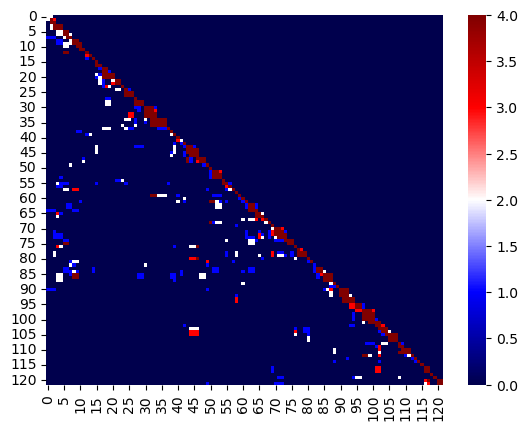

In [228]:
import seaborn as sns

sns.heatmap(count_matrix, cmap='seismic', vmax=4)

In [130]:
count_matrix

array([[13,  0,  0, ...,  0,  0,  0],
       [ 0,  6,  0, ...,  0,  0,  0],
       [ 0,  1, 11, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 13,  0,  0],
       [ 0,  0,  1, ...,  0, 24,  6],
       [ 0,  0,  4, ...,  0, 17, 29]], dtype=int64)